In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei' #顯示中文

%matplotlib inline
#matplotlib 是python擴充的畫圖funtion，inline表示將圖表鑲嵌進netbook(不會在新視窗中呈現)
#%用於類似下terminal指令

In [2]:
# Load in the train datasets
train = pd.read_csv('data/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('data/test.csv', encoding = "utf-8")
#submission = pd.read_csv('../input/input-iris/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

# 查看資料
看欄位,資料類型,資料內容,資料大小

In [3]:
print('train.shape:')
print(train.shape)
print('train.keys:')
print(train.keys())
print('test.shape:')
print(test.shape)
print('test.keys:')
print(test.keys())

train.shape:
(123, 7)
train.keys:
Index(['id', '花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度', '屬種', 'type'], dtype='object')
test.shape:
(30, 5)
test.keys:
Index(['id', '花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度'], dtype='object')


In [4]:
train.head(5) #顯示前5筆資料

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [5]:
test.head(5)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# One Hot Encoding
把"屬種"轉換成無序列類別

In [6]:
df1 = pd.get_dummies(train.iloc[:,5])
#df1 = pd.get_dummies(train['屬種'])   這種寫法也可以
df1.sample(5)

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
26,0,1,0,0
48,0,0,1,0
56,0,0,1,0
81,0,0,0,1
53,0,0,1,0


# Lable Encoding
把"屬性"轉換成有序列表<br>
在這個例子中用不到<br>
因為有序列表會讓feature有 <span style="color:red">強度性</span><br>
會影響模型的學習

In [7]:
df2 = train['屬種'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3,'Iris-new_type':4})
df2.sample(5)

15    1
39    1
21    1
24    1
17    1
Name: 屬種, dtype: int64

# Data clean - 缺值處理
1.先查看缺失筆數
2.查詢缺失筆數
3.刪除/填補缺失
4.填補的話,可以選擇平均數/眾數

In [8]:
#先看missing data
#如果missing data 占的比例不高 可以直接drop掉(<1%)
miss_sum = train.isnull().sum().sort_values(ascending=False)
miss_sum

花萼寬度    1
花萼長度    1
type    0
屬種      0
花瓣寬度    0
花瓣長度    0
id      0
dtype: int64

In [9]:
#查詢哪幾筆是空值
print(train[train.iloc[:,1].isnull()])
print("---------------------------------------")
print(train[train['花萼寬度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4
---------------------------------------
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4


In [11]:
#drop missing data
train_d_na = train.dropna().reset_index(drop=True) #drop完後 reset index
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


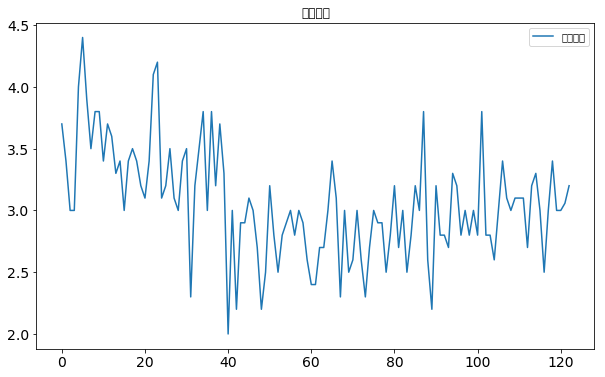

In [12]:
#補平均數
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))

train.plot(kind='line',y='花萼寬度',figsize=(10,6),fontsize=14,title='花萼寬度')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


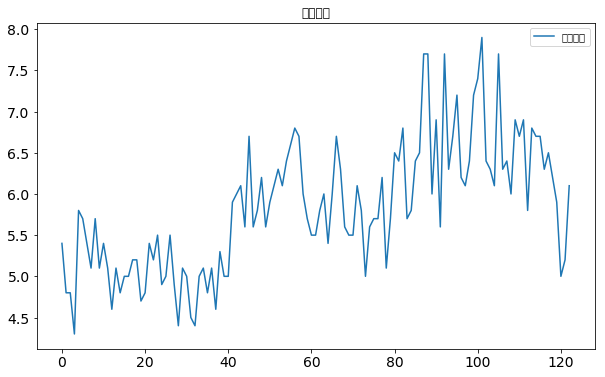

In [13]:
#補眾數
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0]) #眾數可能有很多個，所以回傳的是鎮ㄌㄧㄝ

train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')